1. EDA and Data Cleaning
2. Performance Metrics
3. Hypothesis testing
4. Experiment Evaluation
5. Tableau

* Goal: to see if the new design leads to a better user experience and higher process completion rates.
* The critical question was: Would these changes encourage more clients to complete the process?
* Primary objective is to decode the experiment’s performance. 

* A\B Testing: Control group and Test group.
* Variation: an identical process sequence: an initial page, three subsequent steps, and finally, a confirmation page signaling process completion.


1. Client Profiles (df_final_demo): Demographics like age, gender, and account details of our clients.
2. Digital Footprints (df_final_web_data): A detailed trace of client interactions online, divided into two parts: pt_1 and pt_2. It’s recommended to merge these two files prior to a comprehensive data analysis.
3. Experiment Roster (df_final_experiment_clients): A list revealing which clients were part of the grand experiment

* Gender :  'U' as undisclosed  AND  'X' as unspecified.

  #### Performance indicators or KPI
  
* Completion rate is a metric for content engagement that measures how valuable and relevant your content is to users.
* 
It refers to the number of users who complete predetermined business goals—also referred to as complete activities—that are key to your business growth. 
*The Completion Rate (CR) is a key performance indicator that measures the number of successfully completed activities versus the number of started activities. In general Completion Rate calculated as a percentage by dividing the number of operations successfully completed by the number of operations started..
        
* completion rate = The number of users who completed a set of goal/The number that activated a servce/startedi.

* Average time spent or Total time spent = The average or total time it takes to reach into confirm step or the whole process.

       * Sum of the total time the client took during the whole process.
* Time spent on each step: How long does the client take on each step to complete the processes

       * Average duration of time the user take in each step. 
* Error Rates: When a client moves from later stage/step to the earlier stage/step.
  
       * Total error process/ Total number of process completed.ce

## Exploratory Data Analysis

### EDA for Client demographic data

#### Import necessary libraries

In [13]:
# Load necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Since our data is more or less clean we will start exploring by deviding it in to numerical and catagorical variables. So, We will create one for each variable. 

In [14]:
# Load the data
demog = pd.read_csv('demog.csv')
demog.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105,6,9
1,2304905,7,94,58,U,2,110860,6,9


In [15]:
# Drop unnamed: 0 column 
#demo = demog.drop('Unnamed: 0', axis = 'columns')
#demo.head(2)

In [17]:
demog.shape

(70594, 9)

In [18]:
# Extract column names with numerical datatype
demog.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [19]:
# Count and sort the unique values of each numeriacl variables
demo_num = demog.select_dtypes("number").nunique().sort_values(ascending = False)
demo_num

client_id           70594
bal                 56968
clnt_tenure_mnth      482
clnt_age               82
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

Lat's take gendr and do the exploration.

In [20]:
# Frequency table for grnder
freq_tab = demog['gendr'].value_counts()
freq_tab

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [21]:
prop_table = pd.crosstab(index = demog['gendr'], columns = "count")
(prop_table/prop_table.sum()).round(2)

col_0,count
gendr,
F,0.32
M,0.34
U,0.34
X,0.00


Insight: * The most common gender classification is Male, Female, and Undisclosed. That comprising approximately 34%, 34% and 32% respectively.
         
         * The last which is the least frequent gender is Unspecified, making up only 3.

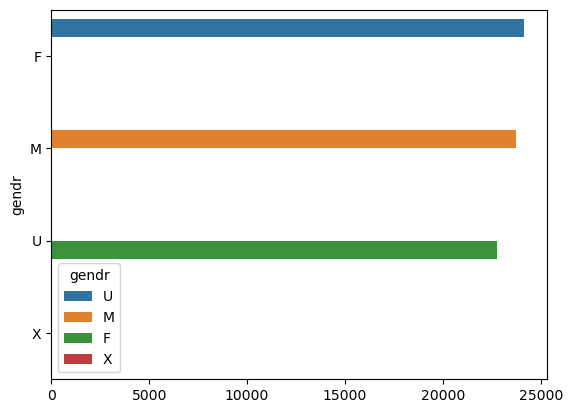

In [22]:
#ax=sns.barplot(y=prop_table.index, x=freq_tab.values, hue=freq_tab.index)
#sns.move_legend(ax, "lower right")
sns.barplot(x = freq_tab.values, y = prop_table.index, hue = freq_tab.index)
plt.show()

From the above chart we observe the same result as the value counts. Three of the gender group covers almost the whole portion, which is Female, Male and Undisclosed. 

Now let's move in to the numerical Vs Catagorical variables. And answer the questions like: 
1. Who are the primary clients using this online process? From the above analysis we can say that; the primary clients in gender wise are Female, Male and Undisclosed.2. 
Are the primary clients younger or older, new or long-standing? From the below graph we can understand that most of the clients are young and middle age. Most of them are in the year between 6 to 21 since they have joined. And the rest have been staying between 36 to 62 years.

In [23]:
demo_num.head()

client_id           70594
bal                 56968
clnt_tenure_mnth      482
clnt_age               82
clnt_tenure_yr         54
dtype: int64

In [25]:
# The top 20 who stayed longer and lesser 
top20_year_long = demog['clnt_tenure_yr'].value_counts().head(20)
# Top 20 who stayed lesser
top20_year_new = demog['clnt_tenure_yr'].value_counts().sort_values().head(20)
top20_year_new

clnt_tenure_yr
62     1
54     1
45     1
41     1
52     2
44     3
49     4
51     5
46     5
42     6
43     6
47     6
50     8
39     9
55     9
40     9
48    16
38    33
37    35
36    36
Name: count, dtype: int64

In [29]:
conditions = [
    (demog['clnt_age']>=14) & (demog['clnt_age']<=30),
    (demog['clnt_age']>=31) & (demog['clnt_age']<=45),
    (demog['clnt_age']>=46) & (demog['clnt_age']<=60),
    (demog['clnt_age']>=61) & (demog['clnt_age']<=75),
    (demog['clnt_age']>=76) & (demog['clnt_age']<=96),
]

values = ['14-30','31-45','46-60','61-75','76-96']
demog['age_category'] = np.select(conditions, values)

In [30]:
demog.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category
0,836976,6,73,60,U,2,45105,6,9,46-60
1,2304905,7,94,58,U,2,110860,6,9,46-60
2,1439522,5,64,32,U,2,52467,6,9,31-45
3,1562045,16,198,49,M,2,67454,3,6,46-60
4,5126305,12,145,33,F,2,103671,0,3,31-45


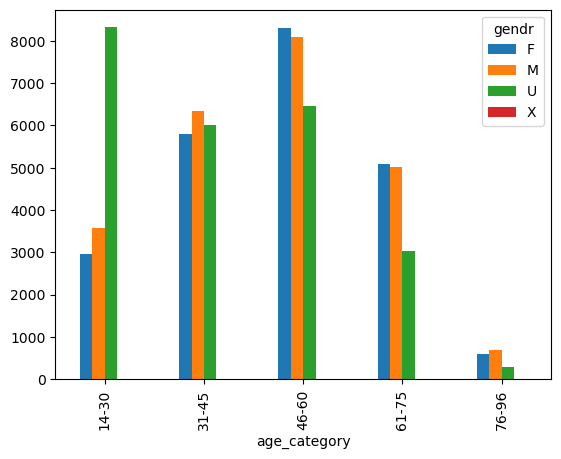

In [31]:
pd.crosstab(demog['age_category'],demog['gendr']).plot.bar()
plt.show()

In [33]:
demog['num_accts'].value_counts().sort_values()

num_accts
8        1
1        2
7        8
6       33
5      284
4     2241
3    12529
2    55496
Name: count, dtype: int64

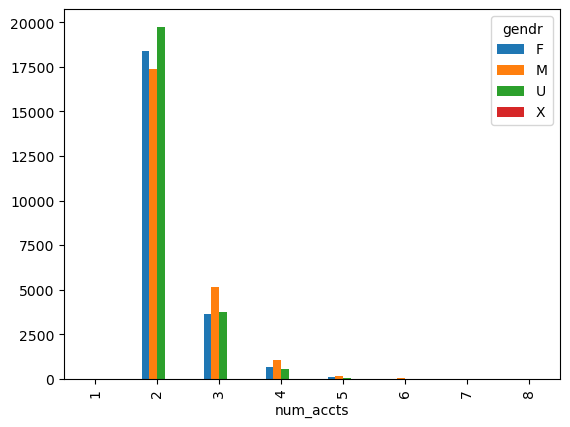

In [34]:
#Let's see gender by number of accounts.
pd.crosstab(demog['num_accts'],demog['gendr']).plot.bar()
plt.show()

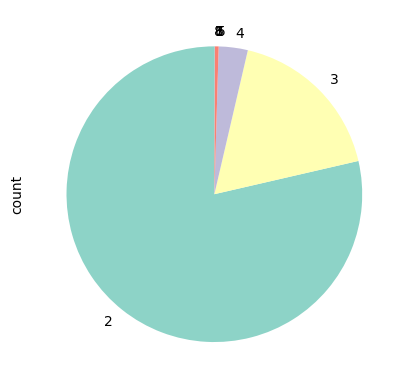

In [35]:
demog['num_accts'].value_counts().plot.pie(startangle=90, colors=sns.color_palette("Set3"));
plt.show()

### EDA for Web_Data

In [61]:
web_data = pd.read_csv('web_data.csv')
web_data.head(b2)

,client_id,visitor_id,visit_id,process_step,time,date,year,month,day
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,"15, 27, 07","2017, Apr, 17",2017,4,17
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,"15, 26, 51","2017, Apr, 17",2017,4,17


In [30]:
web_data = web_data.drop('Unnamed: 0', axis = 'columns')
web_data.head(2)

,client_id,visitor_id,visit_id,process_step,time,date,year,month,day
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,"15, 27, 07","2017, Apr, 17",2017,4,17
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,"15, 26, 51","2017, Apr, 17",2017,4,17


In [45]:
web_data['process_step'].value_counts()

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

In [32]:
web_data.shape

(744641, 9)

In [62]:
web_data.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
time             77640
date                98
year                 1
month                4
day                 31
dtype: int64

Let's calculate the time difference.  

Now let us extract the confirmed and start processes step and save it in to csv file.

In [64]:
pro_start = web_data[web_data["process_step"] == "start"]
pro_start.shape

(234999, 9)

In [68]:
pro_confirm = web_data[web_data["process_step"] == "confirm"]
pro_confirm.shape

(102506, 9)

In [69]:
# Now let's save both files in to csv format
pro_start.to_csv("pro_start.csv")
pro_confirm.to_csv("pro_confirm.csv")

### EDA for final experement client data

In [50]:
final_ex = pd.read_csv('final_ex.csv')
final_ex.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [51]:
# Drop the Unnamed: 0 column
#final_ex.head(2)

In [52]:
final_ex.nunique()

client_id    50500
variation        2
dtype: int64

In [53]:
final_ex['variation'].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

Let's devide the dataset in to two \Test and Control group\

In [54]:
test_group = final_ex[final_ex["variation"] == "Test"]
test_group.shape

(26968, 2)

In [70]:
# Since we will merge the datasets let's change the column names of variations accordingly
test_group.columns = ['client_id', 'variation_test']
test_group.head(2)

,client_id,variation_test
0,9988021,Test
1,8320017,Test


In [56]:
control_group = final_ex[final_ex["variation"] == "Control"]
control_group.shape

(23532, 2)

In [71]:
control_group.columns = ['client_id', 'variation_control']
control_group.head(2)

,client_id,variation_control
2,4033851,Control
4,9294070,Control


In [72]:
# Let's save them to csv file
test_group.to_csv("test_group.csv")
control_group.to_csv("control_group.csv")

Let's merge the data first for test group then control group

In [82]:
#Let us merge the dataset based on client_ID for test group and demog
merge_1 = pd.merge(demog, test_group, on='client_id')

In [84]:
# Let us check our dataset
merge_1.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_test
0,836976,6,73,60,U,2,45105,6,9,46-60,Test
1,1439522,5,64,32,U,2,52467,6,9,31-45,Test


In [85]:
merge_1.shape

(26961, 11)

In [86]:
# now let's merge the dataset of merge_1 and web_data
test_merge = pd.merge(web_data, merge_1, on = 'client_id')

In [87]:
# Lets check the dataset
test_merge.head(2)

,client_id,visitor_id,visit_id,process_step,time,date,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_test
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,"15, 27, 07","2017, Apr, 17",2017,4,17,5,64,79,U,2,189023,1,4,76-96,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,"15, 26, 51","2017, Apr, 17",2017,4,17,5,64,79,U,2,189023,1,4,76-96,Test


In [88]:
test_merge.shape

(176641, 19)

In [89]:
# Let's save the dataset of test_merge
test_merge.to_csv("test_merge.csv")

In [98]:
test_merge['process_step'].value_counts()

process_step
start      55753
step_1     38651
step_2     30888
step_3     25755
confirm    25594
Name: count, dtype: int64

Let us move to control group

In [90]:
# First we merge control_group with demog
merge_2 = pd.merge(demog, control_group, on = 'client_id')

In [91]:
merge_2.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control
0,2304905,7,94,58,U,2,110860,6,9,46-60,Control
1,5126305,12,145,33,F,2,103671,0,3,31-45,Control


In [92]:
# Now we will merge merge_2 dataset and web_data
control_merge = pd.merge(web_data, merge_2, on = 'client_id')

In [93]:
control_merge.head(2)

,client_id,visitor_id,visit_id,process_step,time,date,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,"12, 29, 03","2017, Apr, 05",2017,4,5,12,149,64,M,2,142642,5,8,61-75,Control
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,"12, 29, 01","2017, Apr, 05",2017,4,5,12,149,64,M,2,142642,5,8,61-75,Control


In [94]:
control_merge.shape

(140482, 19)

In [95]:
# Now save it in to csv file
control_merge.to_csv("control_merge.csv")

In [96]:
control_merge['process_step'].value_counts()

process_step
start      45361
step_1     29533
step_2     25764
step_3     22495
confirm    17329
Name: count, dtype: int64

In [119]:
# Let's sort the dataframe based on client_id, visit_id, Process_step, date, time.
# Define the sort_ function
def sort_val(column):
    return (column[0],column[2])

In [120]:
# Sort our dataframe based on multiple columns
control_sorted = sorted(control_merge, key = sort_val)

In [124]:
for col in sort_val:
    print(col)

TypeError: 'function' object is not iterable